In [1]:
import speechbrain
import torchaudio
import numpy as np
import tensorflow

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, ELU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

### Cargando la Data

In [3]:
# open file in read mode and read data 
filename = '../processed_data/mfccs_big_and_small.npy'
with open(filename, 'rb') as f:
    Xb = np.load(f)
    yb = np.load(f)
    Xs = np.load(f)
    ys = np.load(f)
    Xbl = np.load(f)
    ybl = np.load(f)
    Xsl = np.load(f)
    ysl = np.load(f)
# Check that we've recovered the right data
print(f'Xb:{Xb.shape}, yb:{yb.shape}')
print(f'Xs:{Xs.shape}, ys:{ys.shape}')
print(f'Xb:{Xbl.shape}, yb:{ybl.shape}')
print(f'Xs:{Xsl.shape}, ys:{ysl.shape}')

Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)
Xb:(1440, 40), yb:(1440,)
Xs:(1440, 12), ys:(1440,)


In [4]:
filename = '../processed_data/ALL40_48.npy'
with open(filename, 'rb') as f:
    ALL40_48 = np.load(f)

In [5]:
filename = '../processed_data/ZE_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    Z = np.load(f)
    E = np.load(f)
    Y = np.load(f)
print(f'Features:{ALL40_48.shape}, Classes:{Y.shape}')

Features:(5760, 885), Classes:(5760,)


In [6]:
filename = '../processed_data/ALL40_22.npy'
with open(filename, 'rb') as f:
    ALL40_22 = np.load(f)
print(f'Features:{ ALL40_22 .shape}, Classes:{Y.shape}')

Features:(5760, 885), Classes:(5760,)


### Splitting the data

In [7]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, yb, test_size=0.10, random_state=42)

x_traincnn_b = np.expand_dims(X_train_b, axis=2)
x_testcnn_b = np.expand_dims(X_test_b, axis=2)
y_train_b = (y_train_b - 1).astype(int)
y_test_b = (y_test_b - 1).astype(int)

### Modelo 3

1D - Sequential Model from Literature. Using as a baseline the following architecture (2010) [Link](https://ieeexplore.ieee.org/document/9122698)

In [8]:
model_1 = Sequential()

model_1.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.1))
model_1.add(MaxPooling1D(pool_size=(8)))
model_1.add(Conv1D(128, 5,padding='same',))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.1))
model_1.add(Flatten())
model_1.add(Dense(8))
model_1.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [9]:
model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
model_1.summary()
model_0_v1 = tensorflow.keras.models.clone_model(model_1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           768       
_________________________________________________________________
activation (Activation)      (None, 40, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_1 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0

In [12]:
cnnhistory_m1=model_1.fit(x_traincnn_b, np.array(y_train_b), batch_size=16, epochs=204, validation_data=(x_testcnn_b, np.array(y_test_b)))

Epoch 1/204
81/81 [==============================] - 1s 6ms/step - loss: 9.1988 - accuracy: 0.1150 - val_loss: 2.3442 - val_accuracy: 0.1389
Epoch 2/204
81/81 [==============================] - 0s 4ms/step - loss: 7.2867 - accuracy: 0.1381 - val_loss: 2.6461 - val_accuracy: 0.1667
Epoch 3/204
81/81 [==============================] - 0s 4ms/step - loss: 6.4160 - accuracy: 0.1451 - val_loss: 2.2754 - val_accuracy: 0.2361
Epoch 4/204
81/81 [==============================] - 0s 4ms/step - loss: 5.7712 - accuracy: 0.1551 - val_loss: 2.1695 - val_accuracy: 0.2986
Epoch 5/204
81/81 [==============================] - 0s 4ms/step - loss: 5.1654 - accuracy: 0.1713 - val_loss: 2.1981 - val_accuracy: 0.2778
Epoch 6/204
81/81 [==============================] - 0s 4ms/step - loss: 4.7898 - accuracy: 0.1574 - val_loss: 2.2868 - val_accuracy: 0.2778
Epoch 7/204
81/81 [==============================] - 0s 4ms/step - loss: 4.1372 - accuracy: 0.1698 - val_loss: 2.1982 - val_accuracy: 0.2083
Epoch 8/204
8

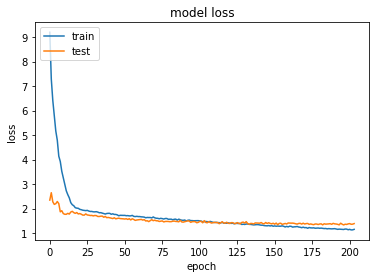

In [13]:
plt.plot(cnnhistory_m1.history['loss'])
plt.plot(cnnhistory_m1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

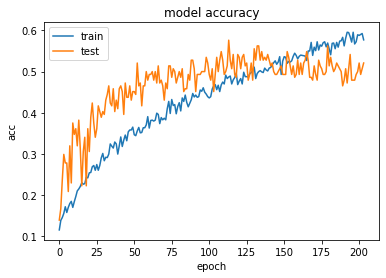

In [14]:
plt.plot(cnnhistory_m1.history['accuracy'])
plt.plot(cnnhistory_m1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Same Model with Data Augmentation

In [15]:
filename = '../processed_data/MFCCs_AUGMENTED_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    F12 = np.load(f)
    F40 = np.load(f)
    Y = np.load(f)

In [16]:
X_train_aug_12, X_test_aug_12, y_train_aug_12, y_test_aug_12 = train_test_split(F12, Y, test_size=0.20, random_state=42)
X_train_aug_40, X_test_aug_40, y_train_aug_40, y_test_aug_40 = train_test_split(F40, Y, test_size=0.20, random_state=42)

Utilizando 40 features

In [17]:
x_traincnn_b_aug = np.expand_dims(X_train_aug_40, axis=2)
x_testcnn_b_aug  = np.expand_dims(X_test_aug_40, axis=2)
y_train_b_aug  = (y_train_aug_40 - 1).astype(int)
y_test_b_aug  = (y_test_aug_40 - 1).astype(int)

In [20]:
model_0_v1.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
cnnhistory_m0_v1=model_0_v1.fit(x_traincnn_b_aug, np.array(y_train_b_aug), batch_size=16, epochs=204, validation_data=(x_testcnn_b_aug, np.array(y_test_b_aug)))

Epoch 1/204
288/288 [==============================] - 2s 4ms/step - loss: 6.8371 - accuracy: 0.1285 - val_loss: 2.6201 - val_accuracy: 0.1510
Epoch 2/204
288/288 [==============================] - 1s 4ms/step - loss: 4.6560 - accuracy: 0.1632 - val_loss: 2.2399 - val_accuracy: 0.1953
Epoch 3/204
288/288 [==============================] - 1s 5ms/step - loss: 3.3798 - accuracy: 0.1671 - val_loss: 2.0693 - val_accuracy: 0.2491
Epoch 4/204
288/288 [==============================] - 1s 5ms/step - loss: 2.5828 - accuracy: 0.1864 - val_loss: 1.8788 - val_accuracy: 0.2873
Epoch 5/204
288/288 [==============================] - 1s 5ms/step - loss: 2.2008 - accuracy: 0.2070 - val_loss: 1.8902 - val_accuracy: 0.2847
Epoch 6/204
288/288 [==============================] - 1s 4ms/step - loss: 2.0598 - accuracy: 0.2109 - val_loss: 1.8949 - val_accuracy: 0.2908
Epoch 7/204
288/288 [==============================] - 1s 4ms/step - loss: 1.9887 - accuracy: 0.2420 - val_loss: 1.8738 - val_accuracy: 0.3038

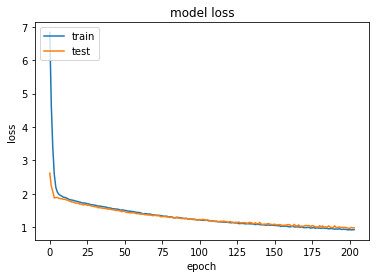

In [22]:
plt.plot(cnnhistory_m0_v1.history['loss'])
plt.plot(cnnhistory_m0_v1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

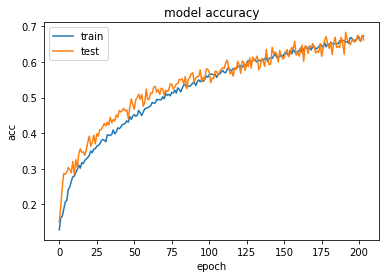

In [23]:
plt.plot(cnnhistory_m0_v1.history['accuracy'])
plt.plot(cnnhistory_m0_v1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
predictions=model_0_v1.predict(x_testcnn_b_aug) 
classes_x=np.argmax(predictions,axis=1)

In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test_b_aug,classes_x)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.42      0.43        66
           1       0.78      0.86      0.81       153
           2       0.57      0.56      0.57       153
           3       0.70      0.48      0.57       178
           4       0.66      0.83      0.74       152
           5       0.68      0.64      0.66       147
           6       0.60      0.62      0.61       154
           7       0.72      0.77      0.75       149

    accuracy                           0.66      1152
   macro avg       0.64      0.65      0.64      1152
weighted avg       0.66      0.66      0.66      1152



In [27]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_b_aug, classes_x)
print (matrix)

[[ 28  13   6  10   0   1   4   4]
 [ 10 131   3   3   1   0   5   0]
 [  8   3  86   9  14  14   7  12]
 [  9  14  16  86   4  17  22  10]
 [  0   4   5   0 126   1   9   7]
 [  4   1  12  10   7  94   9  10]
 [  3   3   9   4  31   7  96   1]
 [  1   0  14   1   7   4   7 115]]


In [30]:
loss, acc = model_0_v1.evaluate(x_testcnn_b_aug, np.asarray(y_test_b_aug))
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

36/36 [==============================] - 0s 3ms/step - loss: 0.9880 - accuracy: 0.6615
Restored model, accuracy: 66.15%
